<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/Reading_Data_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Objective(s)

* Create a SQL database connection to a sample SQL database, and read records
from that database
* Explore common input parameters

**Packages**


* Pandas
* Pandas.read_sql
* SQLite3   
   

 Structured Query Language (SQL)


# Database connections

Our first step will be to create a connection to our SQL database. A few common SQL databases used with Python include:

* Microsoft SQL Server
* Postgres
* MySQL
* AWS Redshift
* AWS Aurora
* Oracle DB
* Terradata
* Db2 Family
* Many, many others
Each of these databases will require a slightly different setup, and may require credentials (username & password), tokens, or other access requirements. We'll be using sqlite3 to connect to the database, but other connection packages include:

* SQLAlchemy (most common)
* psycopg2
* MySQLdb

In [ ]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd

In [ ]:
# Download the database
!wget -P data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db

--2024-07-26 15:28:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5652480 (5.4M) [binary/octet-stream]
Saving to: ‘data/classic_rock.db’

classic_rock.db     100%[===================>]   5.39M  15.2MB/s    in 0.4s    

2024-07-26 15:28:56 (15.2 MB/s) - ‘data/classic_rock.db’ saved [5652480/5652480]



In [ ]:
# Initialize path to SQLite databasejdbc:sqlite:/C:/__tmp/test/sqlite/jdbcTest.db
path = 'data/classic_rock.db'
con = sq3.Connection(path)

# We now have a live connection to our SQL database
con

# Reading data
Now that we've got a connection to our database, we can perform queries, and load their results in as Pandas DataFrames

In [ ]:
# Query to get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and get the table names
table_names = pds.read_sql_query(query, con)
table_names

,name
0,rock_songs
1,rock_plays


In [ ]:
query= "SELECT * FROM  rock_songs"
df = pds.read_sql(query, con)
df.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


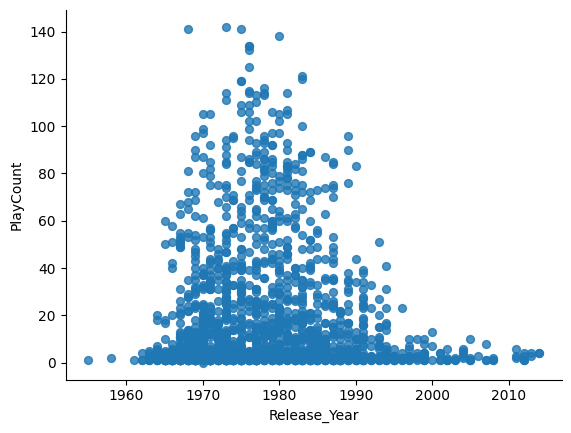

In [ ]:
# @title Release_Year vs PlayCount

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Release_Year', y='PlayCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# We can also run any supported SQL query
# Write the query
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


# Common parameters
There are a number of common paramters that can be used to read in SQL data with formatting:

* coerce_float: Attempt to force numbers into floats
* parse_dates: List of columns to parse as dates
* chunksize: Number of rows to include in each chunk


In [ ]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pds.read_sql(query,
                            con,
                            coerce_float=True, # Doesn't efefct this dataset, because floats were correctly parsed
                            parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                            chunksize=5 # Allows for streaming results as a series of shorter tables
                           )
for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}'.format(index))
        display(observations)

Observations index: 0


,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1970-01-01 00:32:47,23,6.565217
1,Led Zeppelin,1970-01-01 00:32:49,18,21.000000
2,The Beatles,1970-01-01 00:32:45,15,3.800000
3,The Beatles,1970-01-01 00:32:48,13,13.000000
4,The Beatles,1970-01-01 00:32:49,13,15.000000


Observations index: 1


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:50,12,13.166667
1,Led Zeppelin,1970-01-01 00:32:55,12,14.166667
2,Pink Floyd,1970-01-01 00:32:59,11,41.454545
3,Pink Floyd,1970-01-01 00:32:53,10,29.100000
4,The Doors,1970-01-01 00:32:47,10,28.900000


Observations index: 2


,Artist,Release_Year,num_songs,avg_plays
0,Fleetwood Mac,1970-01-01 00:32:57,9,35.666667
1,Jimi Hendrix,1970-01-01 00:32:47,9,24.888889
2,The Beatles,1970-01-01 00:32:43,9,2.444444
3,The Beatles,1970-01-01 00:32:44,9,3.111111
4,Elton John,1970-01-01 00:32:53,8,18.500000


Observations index: 3


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:51,8,47.750000
1,Led Zeppelin,1970-01-01 00:32:53,8,34.125000
2,Boston,1970-01-01 00:32:56,7,69.285714
3,Rolling Stones,1970-01-01 00:32:49,7,36.142857
4,Van Halen,1970-01-01 00:32:58,7,51.142857


Observations index: 4


,Artist,Release_Year,num_songs,avg_plays
0,Bruce Springsteen,1970-01-01 00:32:55,6,7.666667
1,Bruce Springsteen,1970-01-01 00:33:04,6,11.500000
2,Creedence Clearwater Revival,1970-01-01 00:32:49,6,23.833333
3,Creedence Clearwater Revival,1970-01-01 00:32:50,6,18.833333
4,Def Leppard,1970-01-01 00:33:07,6,32.000000


In [ ]:
from google.colab import sheets
observations=pds.read_sql(query, con)
print(observations.head())
sheet = sheets.InteractiveSheet(df=observations)

         Artist  Release_Year  num_songs  avg_plays
0   The Beatles        1967.0         23   6.565217
1  Led Zeppelin        1969.0         18  21.000000
2   The Beatles        1965.0         15   3.800000
3   The Beatles        1968.0         13  13.000000
4   The Beatles        1969.0         13  15.000000
https://docs.google.com/spreadsheets/d/1fCM8dKTAk3tZftTAp3LPTJ8JddR6rmdi8ug0LOFp7kc#gid=0


In [ ]:
# Download the database
!wget -P data https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/baseball.db

--2024-07-26 17:07:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/baseball.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7626752 (7.3M) [binary/octet-stream]
Saving to: ‘data/baseball.db.1’

baseball.db.1       100%[===================>]   7.27M  42.7MB/s    in 0.2s    

2024-07-26 17:07:12 (42.7 MB/s) - ‘data/baseball.db.1’ saved [7626752/7626752]



In [ ]:
query='SELECT * FROM sqlite_master'
con=sq3.Connection('data/baseball.db')
pds.read_sql(query, con)

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n""index"" INTEGER,..."
1,index,ix_allstarfull_index,allstarfull,3,"CREATE INDEX ""ix_allstarfull_index""ON ""allstar..."
2,table,schools,schools,26,"CREATE TABLE ""schools"" (\n""index"" INTEGER,\n ..."
3,index,ix_schools_index,schools,31,"CREATE INDEX ""ix_schools_index""ON ""schools"" (""..."
4,table,batting,batting,99,"CREATE TABLE ""batting"" (\n""index"" INTEGER,\n ..."
5,index,ix_batting_index,batting,100,"CREATE INDEX ""ix_batting_index""ON ""batting"" (""..."


In [ ]:
# Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players
best_query = """
SELECT playerID, sum(GP) AS num_games_played, AVG(startingPos) AS avg_starting_position
    FROM allstarfull
    GROUP BY playerID
    ORDER BY num_games_played DESC, avg_starting_position ASC
    limit 3;
"""
best = pds.read_sql(best_query, con)
print(best.head())

    playerID  num_games_played  avg_starting_position
0  musiast01              24.0               6.357143
1   mayswi01              24.0               8.000000
2  aaronha01              24.0               8.470588
